In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

import copy

import wrangle

from scipy import stats

seed = 55

## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
zillow = wrangle.get_zillow()
zillow = wrangle.drop_zill(zillow)
train, val, test = wrangle.train_val_test(zillow)
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [4]:
train.head(2)

,bed,bath,sqft,value,year,tax,fips
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0


In [ ]:
con

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [11]:
def plot_variable_pairs(df):
    sns.pairplot(df.sample(10_000), kind='reg', plot_kws={'line_kws':{'color': 'red'}})

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


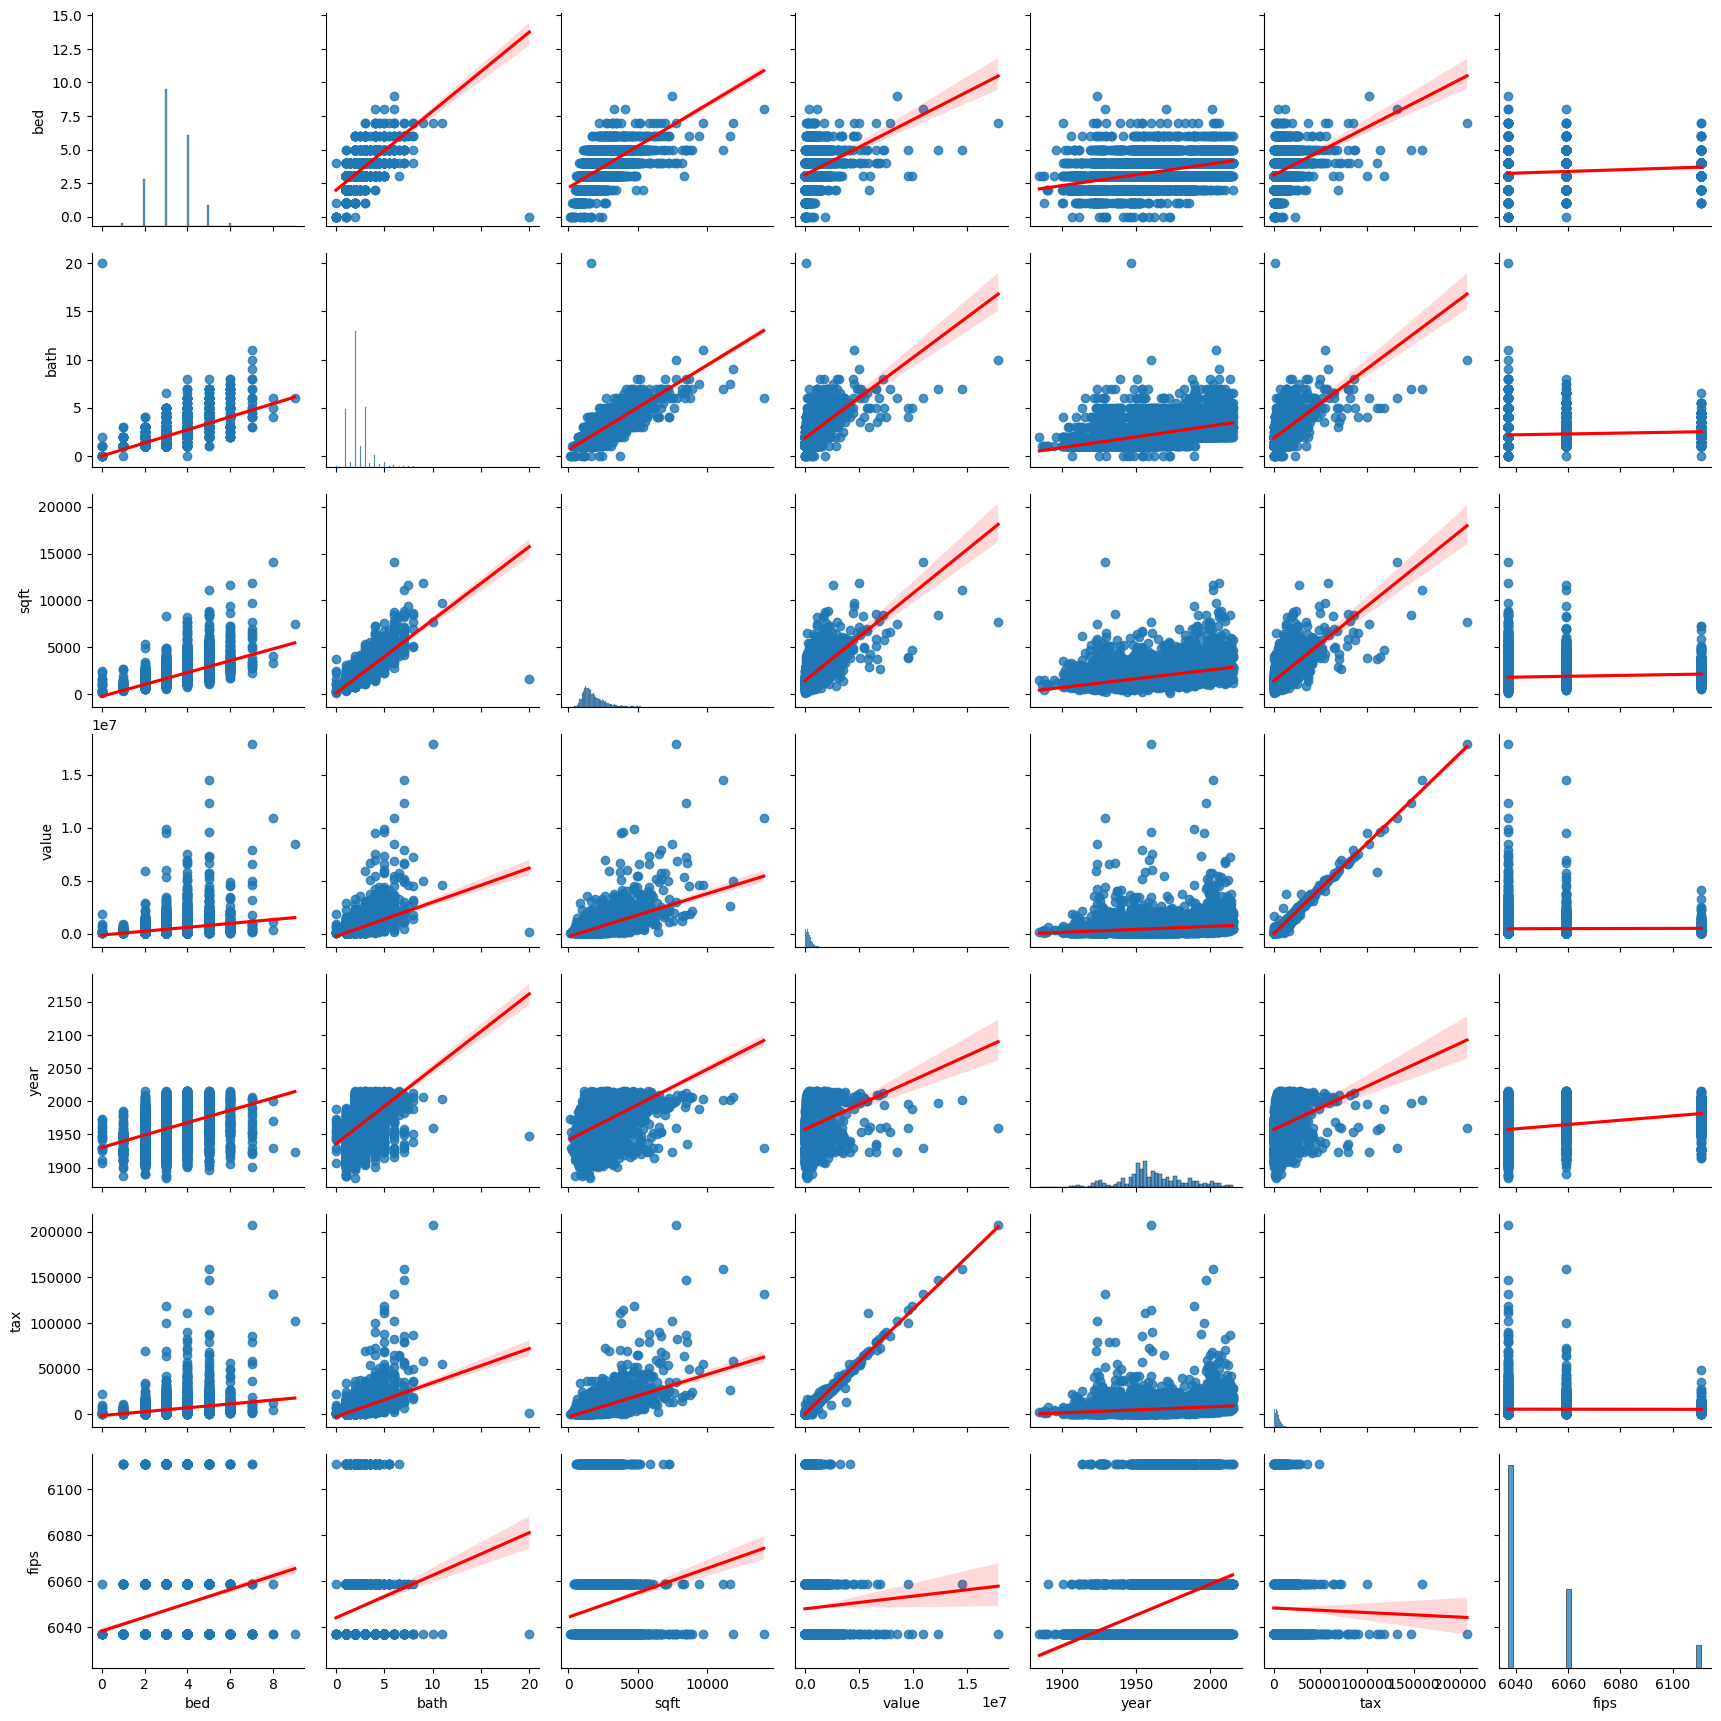

In [14]:
plot_variable_pairs(train)
plt.show()

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [13]:
zillow.head(2)

,bed,bath,sqft,value,year,tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0


In [37]:
sorted(zillow.year.unique())

[1801.0,
 1807.0,
 1812.0,
 1823.0,
 1833.0,
 1840.0,
 1855.0,
 1862.0,
 1865.0,
 1870.0,
 1874.0,
 1875.0,
 1876.0,
 1877.0,
 1878.0,
 1879.0,
 1880.0,
 1881.0,
 1882.0,
 1883.0,
 1884.0,
 1885.0,
 1886.0,
 1887.0,
 1888.0,
 1889.0,
 1890.0,
 1891.0,
 1892.0,
 1893.0,
 1894.0,
 1895.0,
 1896.0,
 1897.0,
 1898.0,
 1899.0,
 1900.0,
 1901.0,
 1902.0,
 1903.0,
 1904.0,
 1905.0,
 1906.0,
 1907.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1912.0,
 1913.0,
 1914.0,
 1915.0,
 1916.0,
 1917.0,
 1918.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 

In [36]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   bed     float64
 1   bath    float64
 2   sqft    float64
 3   value   float64
 4   year    float64
 5   tax     float64
 6   fips    float64
dtypes: float64(7)
memory usage: 130.6 MB


In [20]:
cat = ['bed','bath','fips']
cont = ['sqft', 'value', 'year', 'tax']

In [23]:
# df is name of data frame
# cat is a list of all catagorical data
# cont is a list of all continuos data
def plot_categorical_and_continuous_vars(df, cat, cont):
    for i in cat:
        for l in cont:
            sns.barplot(data=df, x=i , y=l)
            plt.show()

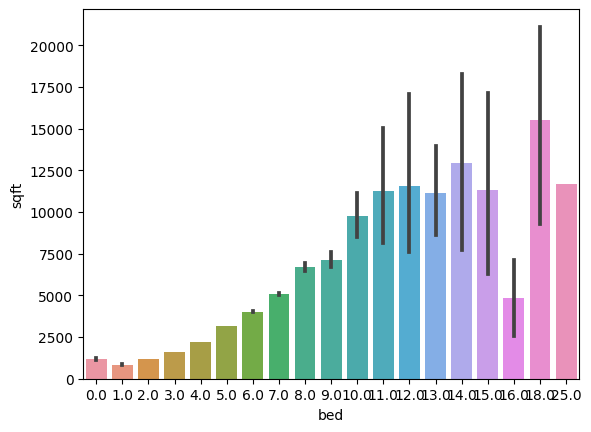

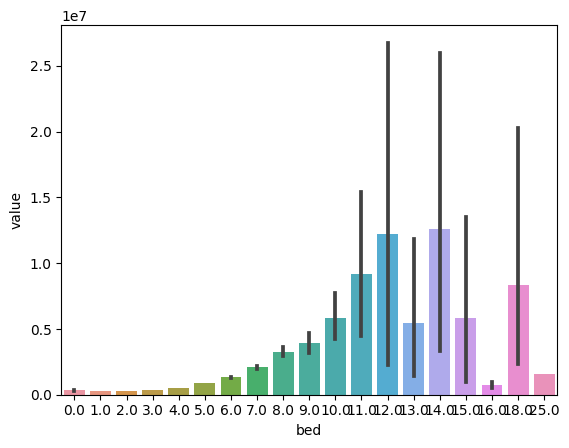

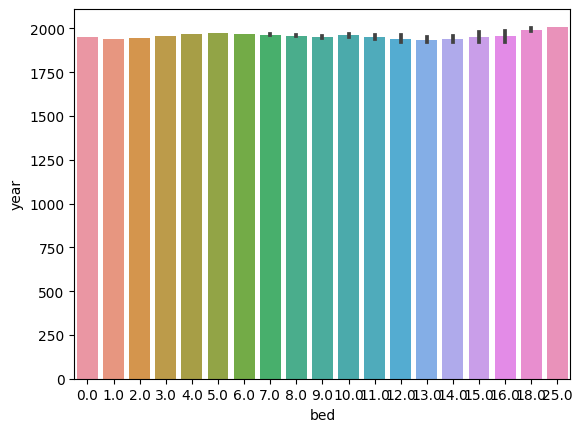

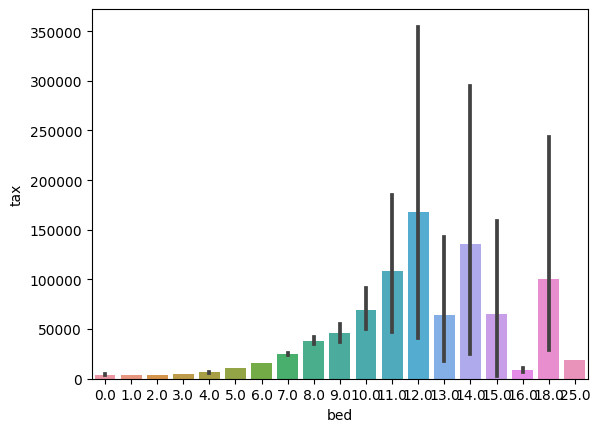

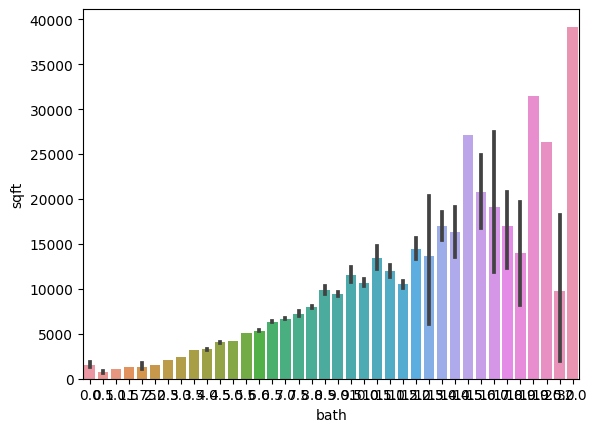

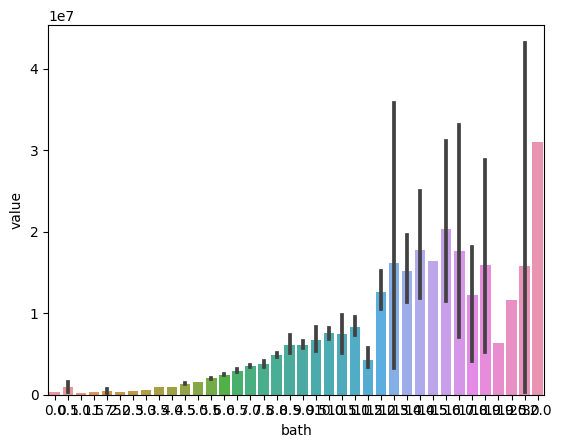

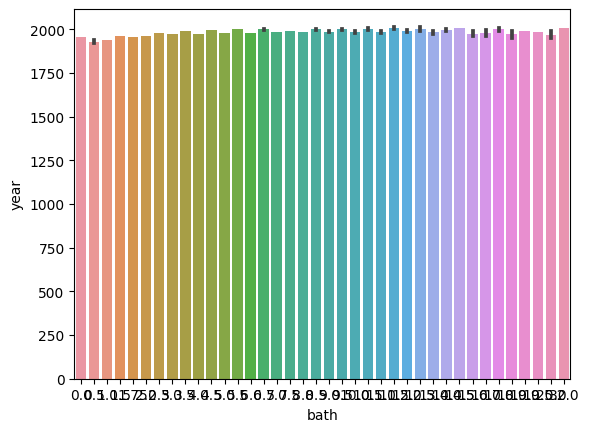

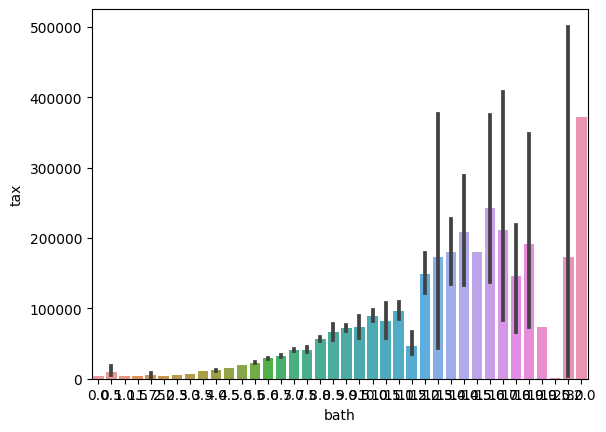

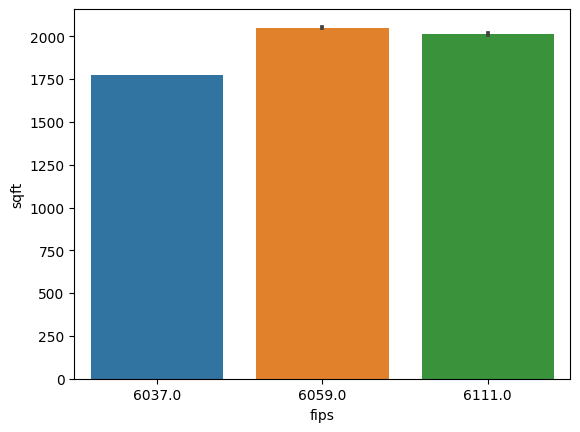

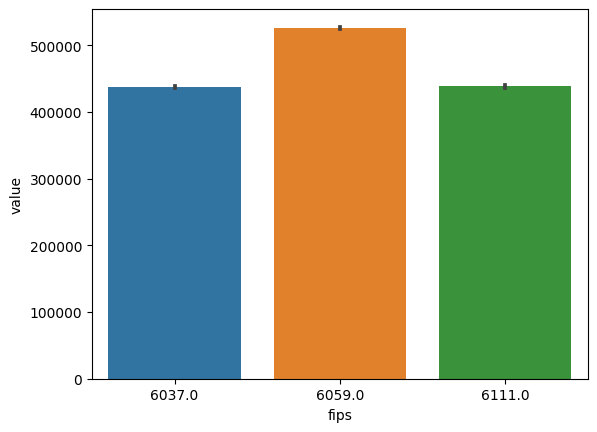

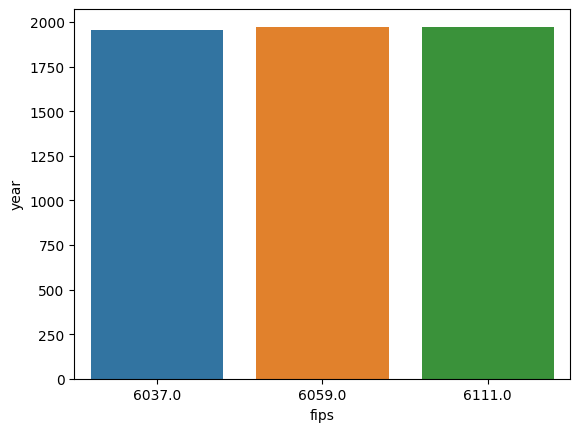

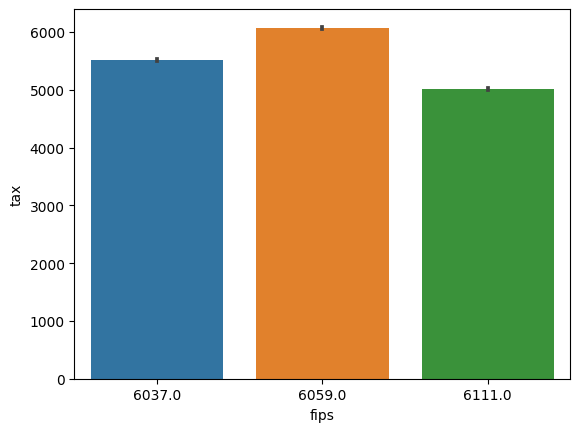

In [25]:
plot_categorical_and_continuous_vars(zillow,cat,cont)

In [ ]:
def plot_variable_pairs(df):
    pairs = list(combinations(df.columns,2))
    for col1, col2 in pairs:
        sns.lmplot(x="col", y="final_grade", data=train, line_kws={'color': 'red'})
    
    sns.lmplot(x="exam1", y="final_grade", data=train, line_kws={'color': 'red'})
    plt.show()